Chapter 17
# 距离度量
Book_6《数据有道》 | 鸢尾花书：从加减乘除到机器学习

In [24]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
G = nx.karate_club_graph() 
# 空手道俱乐部图
pos = nx.spring_layout(G,seed=2) 

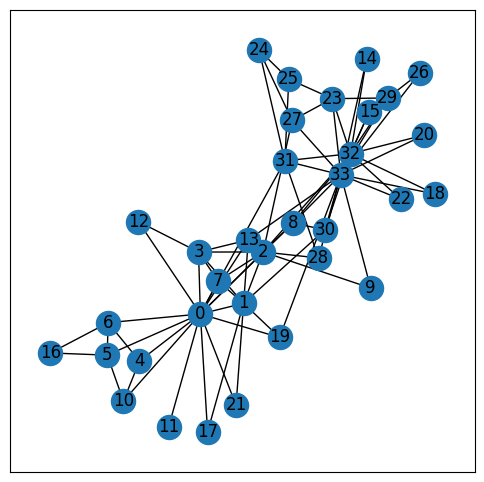

In [4]:
plt.figure(figsize = (6,6))

nx.draw_networkx(G, pos)
# nx.draw_networkx_nodes(G,pos,
#                        nodelist = [11,18],
#                        node_color = 'r')
plt.savefig('空手道俱乐部图.svg')

## 图距离

In [6]:
path_nodes = nx.shortest_path(G, 15, 16)
# 节点15、16之间最短路径
path_nodes

[15, 32, 2, 0, 5, 16]

In [7]:
path_edges = list(nx.utils.pairwise(path_nodes))
# 路径节点序列转化为边序列 (不封闭)

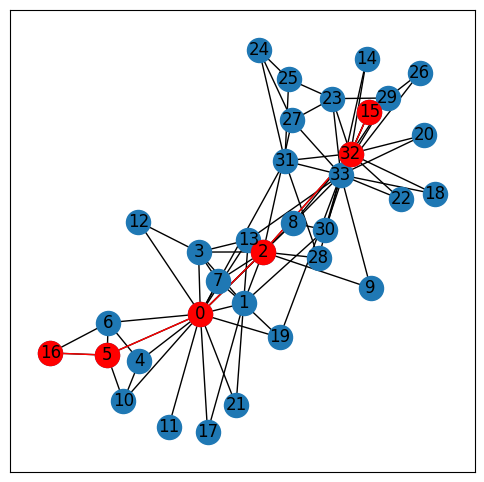

In [8]:
plt.figure(figsize = (6,6))

nx.draw_networkx(G, pos)
nx.draw_networkx_nodes(G,pos,
                       nodelist = path_nodes,
                       node_color = 'r')
nx.draw_networkx_edges(G,pos,
                       edgelist = path_edges,
                       edge_color = 'r')
plt.savefig('空手道俱乐部图，15、16最短路径.svg')

## 图距离矩阵

In [26]:
# 成对最短距离值 (图距离)
distances_all = dict(nx.shortest_path_length(G))

In [10]:
# 创建图距离矩阵
list_nodes = list(G.nodes())
Shortest_D_matrix = np.full((len(G.nodes()), 
                             len(G.nodes())), np.nan)

In [11]:
for i,i_node in enumerate(list_nodes):
    for j,j_node in enumerate(list_nodes):
        try:
            d_ij = distances_all[i_node][j_node]
            Shortest_D_matrix[i][j] = d_ij
        except KeyError:
            print(i_node + ' to ' + j_node + ': no path')
    

In [12]:
Shortest_D_matrix.max()
# 图距离最大值

5.0

In [13]:
Shortest_D_matrix.min()

0.0

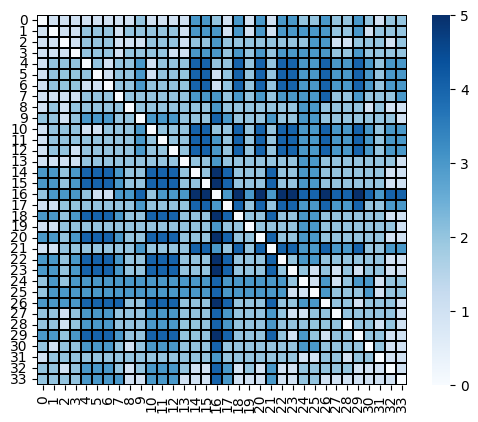

In [14]:
# 用热图可视化图距离矩阵
sns.heatmap(Shortest_D_matrix, cmap = 'Blues', 
            annot = False, 
            xticklabels = list(G.nodes), 
            yticklabels = list(G.nodes),
            linecolor = 'k', square = True,
            cbar = True,
            linewidths = 0.2)
plt.savefig('图距离矩阵，无权图.svg')

In [15]:
# 取出图距离矩阵中所有成对图距离 (不含对角线下三角元素)

# 使用numpy.tril获取下三角矩阵，并排除对角线元素
lower_tri_wo_diag = np.tril(Shortest_D_matrix, k=-1)

# 获取下三角矩阵（不含对角线）的索引
rows, cols = np.tril_indices(Shortest_D_matrix.shape[0], k=-1)

# 使用索引从原矩阵中取出对应的元素
list_shortest_distances = Shortest_D_matrix[rows, cols]

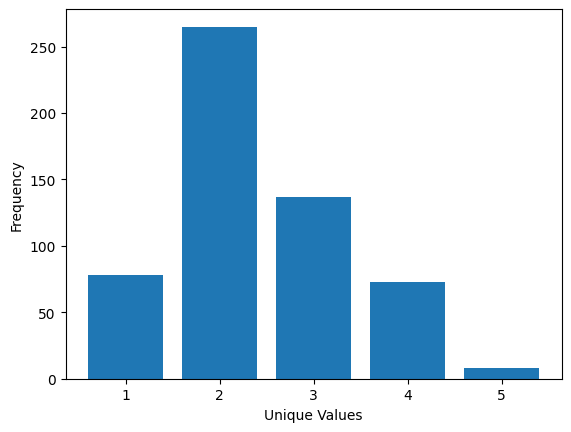

In [16]:
# 使用numpy.unique函数获取独特值及其出现次数
unique_values, counts = np.unique(list_shortest_distances, 
                                  return_counts=True)

# 绘制柱状图
plt.bar(unique_values, counts)
plt.xlabel('Graph distance')
plt.ylabel('Count')
plt.savefig('图距离柱状图.svg')

In [28]:
# 节点平均距离
average_path_lengths = [
    np.mean(list(spl.values())) for spl in distances_all.values()
]

In [30]:
average_all = np.mean(average_path_lengths)
# 节点平均图距离的均值

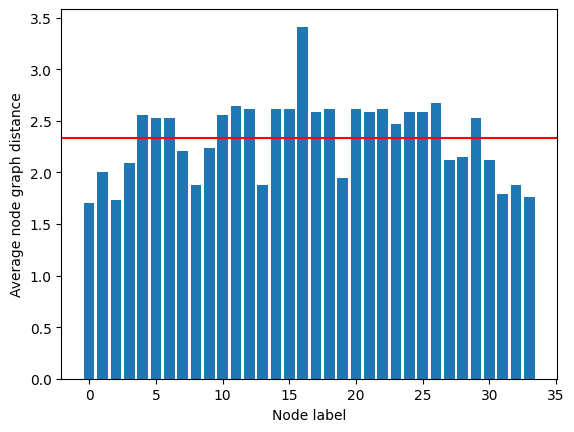

In [44]:
# 每个节点的平均图距离
plt.bar(G.nodes(),average_path_lengths)
plt.axhline(y = average_all, c = 'r')
plt.xlabel('Node label')
plt.ylabel('Average node graph distance')
plt.savefig('节点平均图距离.svg')

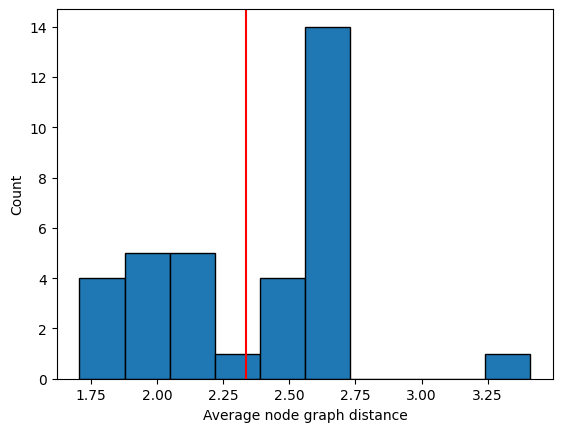

In [45]:


# 绘制直方图
plt.hist(average_path_lengths, ec = 'k')
plt.axvline(x = average_all, c = 'r')
plt.xlabel('Average node graph distance')
plt.ylabel('Count')
plt.savefig('节点图距离直方图.svg')

In [37]:
dict_ave_graph_d = {index: value for index, value in enumerate(average_path_lengths)}

In [39]:
# unique_ave_graph_d

{1.7058823529411764,
 1.7352941176470589,
 1.7647058823529411,
 1.7941176470588236,
 1.8823529411764706,
 1.9411764705882353,
 2.0,
 2.088235294117647,
 2.1176470588235294,
 2.1470588235294117,
 2.2058823529411766,
 2.235294117647059,
 2.4705882352941178,
 2.5294117647058822,
 2.5588235294117645,
 2.588235294117647,
 2.6176470588235294,
 2.6470588235294117,
 2.676470588235294,
 3.411764705882353}

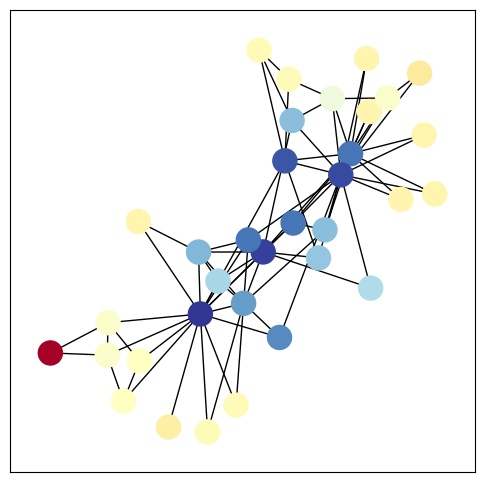

In [48]:
# 根据节点平均图距离大小渲染节点

unique_ave_graph_d = set(average_path_lengths)
# 取出节点离心率独特值

# colors = plt.cm.RdYlBu(np.linspace(0, 1, len(unique_ave_graph_d)))
# 独特值的颜色映射

plt.figure(figsize = (6,6))
nx.draw_networkx(G, pos, 
                 cmap = 'RdYlBu_r', 
                 with_labels = False,
                 node_color = average_path_lengths)

plt.savefig('根据平均图距离大小渲染节点.svg')

## 离心率

In [17]:
eccentricity = nx.eccentricity(G)
# 计算每个节点离心率
eccentricity_list = list(eccentricity.values())
# eccentricity_list

In [18]:
len(eccentricity_list)

34

In [19]:
# 自定义函数，过滤dict
def filter_value(dict_, unique):
    
    newDict = {}
    for (key, value) in dict_.items():
        if value == unique:
            newDict[key] = value
            
    return newDict

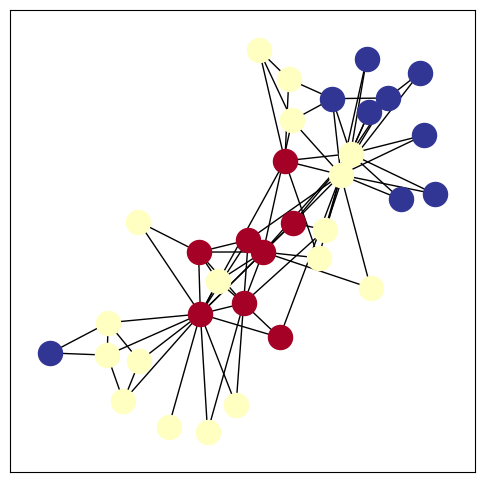

In [23]:
# 根据离心率大小渲染节点

unique_ecc = set(eccentricity_list)
# 取出节点离心率独特值

colors = plt.cm.RdYlBu(np.linspace(0, 1, len(unique_ecc)))
# 独特值的颜色映射

plt.figure(figsize = (6,6))
nx.draw_networkx_edges(G, pos)
# 绘制图的边

# 分别绘制不同离心率
for deg_i, color_i in zip(unique_ecc,colors):
    
    dict_i = filter_value(eccentricity,deg_i)
    nx.draw_networkx_nodes(G, pos, 
                           nodelist = list(dict_i.keys()), 
                           node_color = color_i)
plt.savefig('根据离心率大小渲染节点.svg')

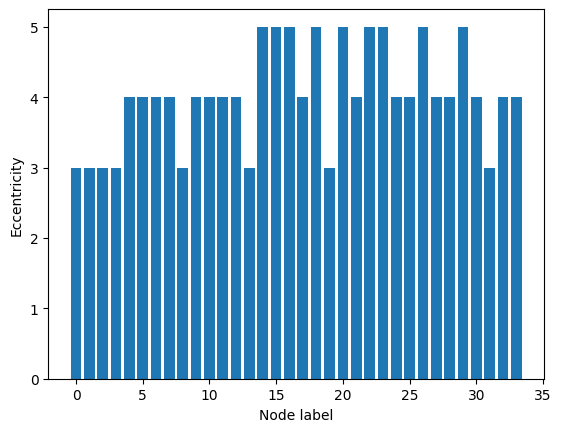

In [36]:
# 每个节点的具体离心率
plt.bar(G.nodes(),eccentricity_list)
plt.xlabel('Node label')
plt.ylabel('Eccentricity')
plt.savefig('节点离心率.svg')

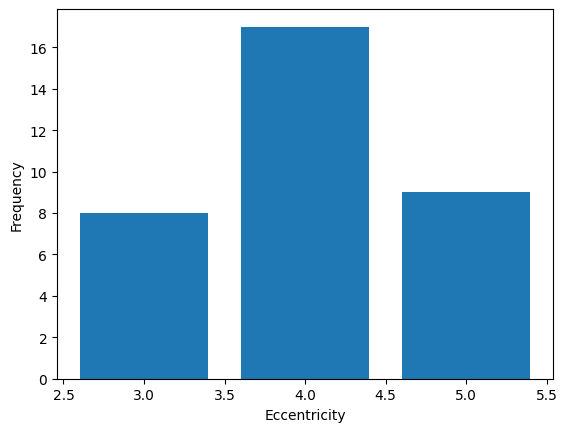

In [38]:
# 使用numpy.unique函数获取独特值及其出现次数
unique_values, counts = np.unique(eccentricity_list, 
                                  return_counts=True)

# 绘制柱状图
plt.bar(unique_values, counts)
plt.xlabel('Eccentricity')
plt.ylabel('Frequency')
plt.savefig('图离心率柱状图.svg')

In [16]:
nx.diameter(G)
# 图直径

5

In [15]:
nx.radius(G)

3

## 中心点

In [46]:
list_centers = list(nx.center(G))
# 获取图的中心点

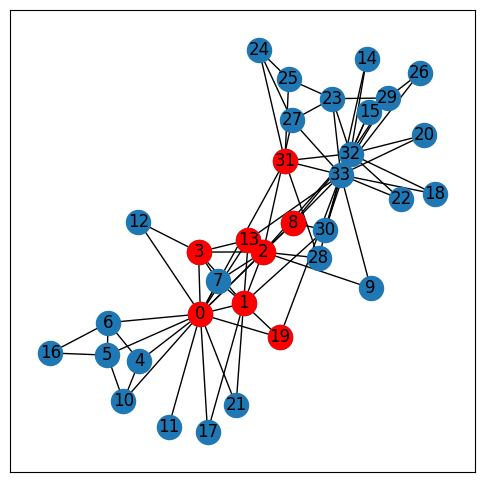

In [47]:
plt.figure(figsize = (6,6))

nx.draw_networkx(G, pos)
nx.draw_networkx_nodes(G,pos,
                       nodelist = list_centers,
                       node_color = 'r')
plt.savefig('空手道俱乐部图，中心点.svg')

## 边缘点

In [49]:
list_periphery = list(nx.periphery(G))
# 获取图的边缘点

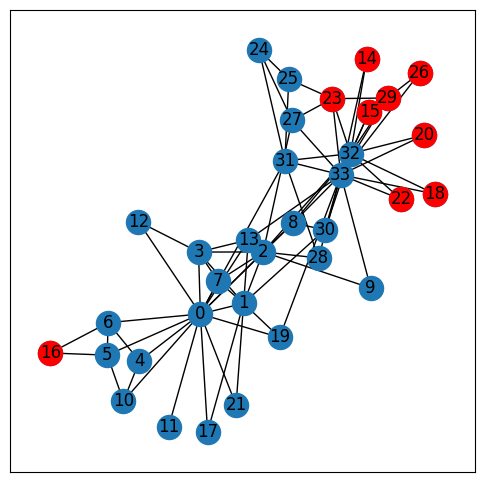

In [50]:
plt.figure(figsize = (6,6))

nx.draw_networkx(G, pos)
nx.draw_networkx_nodes(G,pos,
                       nodelist = list_periphery,
                       node_color = 'r')
plt.savefig('空手道俱乐部图，边缘点.svg')